# Creating a Gaussian Kernel Manually

## Gaussian Function: $G(x,y) = \frac{{\mathrm{e}}^{-(\frac{x^2+y^2}{2\,s^2})}}{2\,s^2\,\pi }$

Rounded Sum of the kernel =  1


(-1.9853625421189203, 0.039788735772973836)

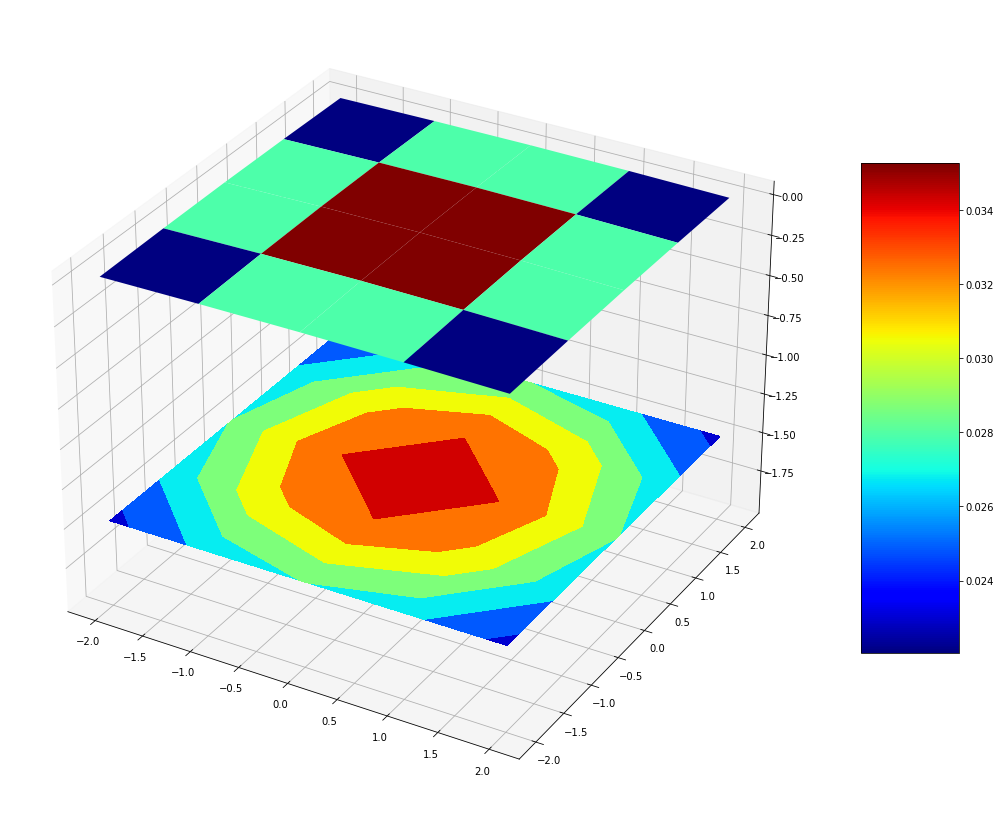

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection ='3d')

dim_of_kernel = 5 # dimension 0f the kernel = 7*7
max_abs = np.floor(dim_of_kernel/2)
x_range = np.arange(-max_abs,max_abs +1,1) #(form -3 to +3 range)
y_range = np.arange(-max_abs,max_abs +1,1) #(form -3 to +3 range)

X,Y = np.meshgrid(x_range, y_range)

sigma = 2 # standard deviation of the distribution
Z = np.exp((-(X**2 + Y**2))/(2*sigma**2))/(2*np.pi*sigma**2) # Gaussian function
print("Rounded Sum of the kernel = ",round(sum(sum(Z))))
#print("Gaussian Kernel = \n",Z)

#plotting the surface
surf = ax.plot_surface(X,Y,Z, cmap = cm.jet, linewidth=0, antialiased=True)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.set_aspect('auto', 'box')
fig.colorbar(surf, shrink=0.5, aspect=5)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))

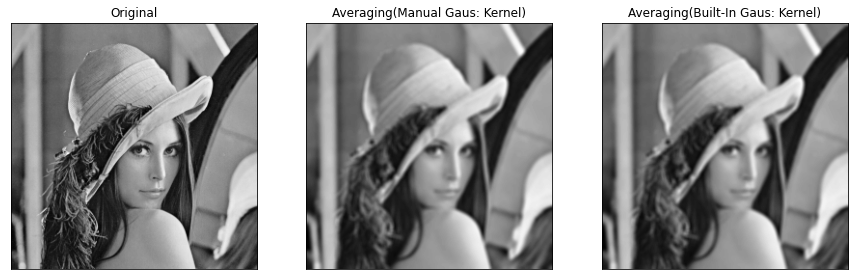

In [87]:
# original img size 768*1024
img = cv.imread('Lenna.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
kernel = Z
imgc = cv.filter2D(img,-1,kernel)
# -1 is the desired depth of the img

# Using opencv builtin Function
kernel = cv.getGaussianKernel(dim_of_kernel, sigma)
filtered = cv.sepFilter2D(img, -1, kernel, kernel)

fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(15,15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging(Manual Gaus: Kernel)')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(imgc, cmap='gray')
axes[2].set_title('Averaging(Built-In Gaus: Kernel)')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()